# Initialize

In [1]:
%cd ".."

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/GenerativeModelsMetrics


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/5D_mixture/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-09-08 09:49:50.611117: Importing os...
2024-09-08 09:49:50.611273: Importing sys...
Visible devices: [0]
2024-09-08 09:49:50.611524: Importing timer from timeit...
2024-09-08 09:49:50.611596: Setting env variables for tf import (only device(s) [0] will be available)...
2024-09-08 09:49:50.611725: Importing numpy...
2024-09-08 09:49:50.736852: Importing matplotlib...
2024-09-08 09:49:51.122497: Importing h5py...
2024-09-08 09:49:51.147786: Importing importlib.util...
2024-09-08 09:49:51.147894: Importing json...
2024-09-08 09:49:51.147959: Importing pandas...
2024-09-08 09:49:51.628484: Importing random...
2024-09-08 09:49:51.628644: Importing scipy utils...
2024-09-08 09:49:52.054297: Importing subprocess...
2024-09-08 09:49:52.054441: Importing tensorflow...
Tensorflow version: 2.16.1
2024-09-08 09:49:55.644275: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-09-08 09:49:56.982216: Importing timeit...
2024-09-08 09:49:56.982324: Importing tqdm...
2

/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-09-08 09:50:02.449481: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-09-08 09:50:02.481454: All done.


# Model definition

In [3]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
dist_1 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
dist_2 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'> <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)
sample from dist_1:  tf.Tensor(
[[-1.21344303  3.79128235 -0.36013196 -4.40885725 -0.9766748 ]
 [ 1.79642973  0.74689922 -1.4338443  -1.6379499   2.47373712]], shape=(2, 5), dtype=float64)
sample from dist_2:  tf.Tensor(
[[-1.21344303  3.79128235 -0.36013196 -4.40885725 -0.9766748 ]
 [ 1.79642973  0.74689922 -1.4338443  -1.6379499   2.47373712]], shape=(2, 5), dtype=float64)


## Deformations

### 1 - $\mu$-deformation

In [4]:
eps = 0.5
dist_def_1 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "mean",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.09818653296679258 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.054716833867132664 s.
Computing HPD intervals...


HPD intervals computed in 4.052616185043007 s.
Computing HPD quotas...
HPD quotas computed in 4.3548074485734105 s.
Plotting corner plot...


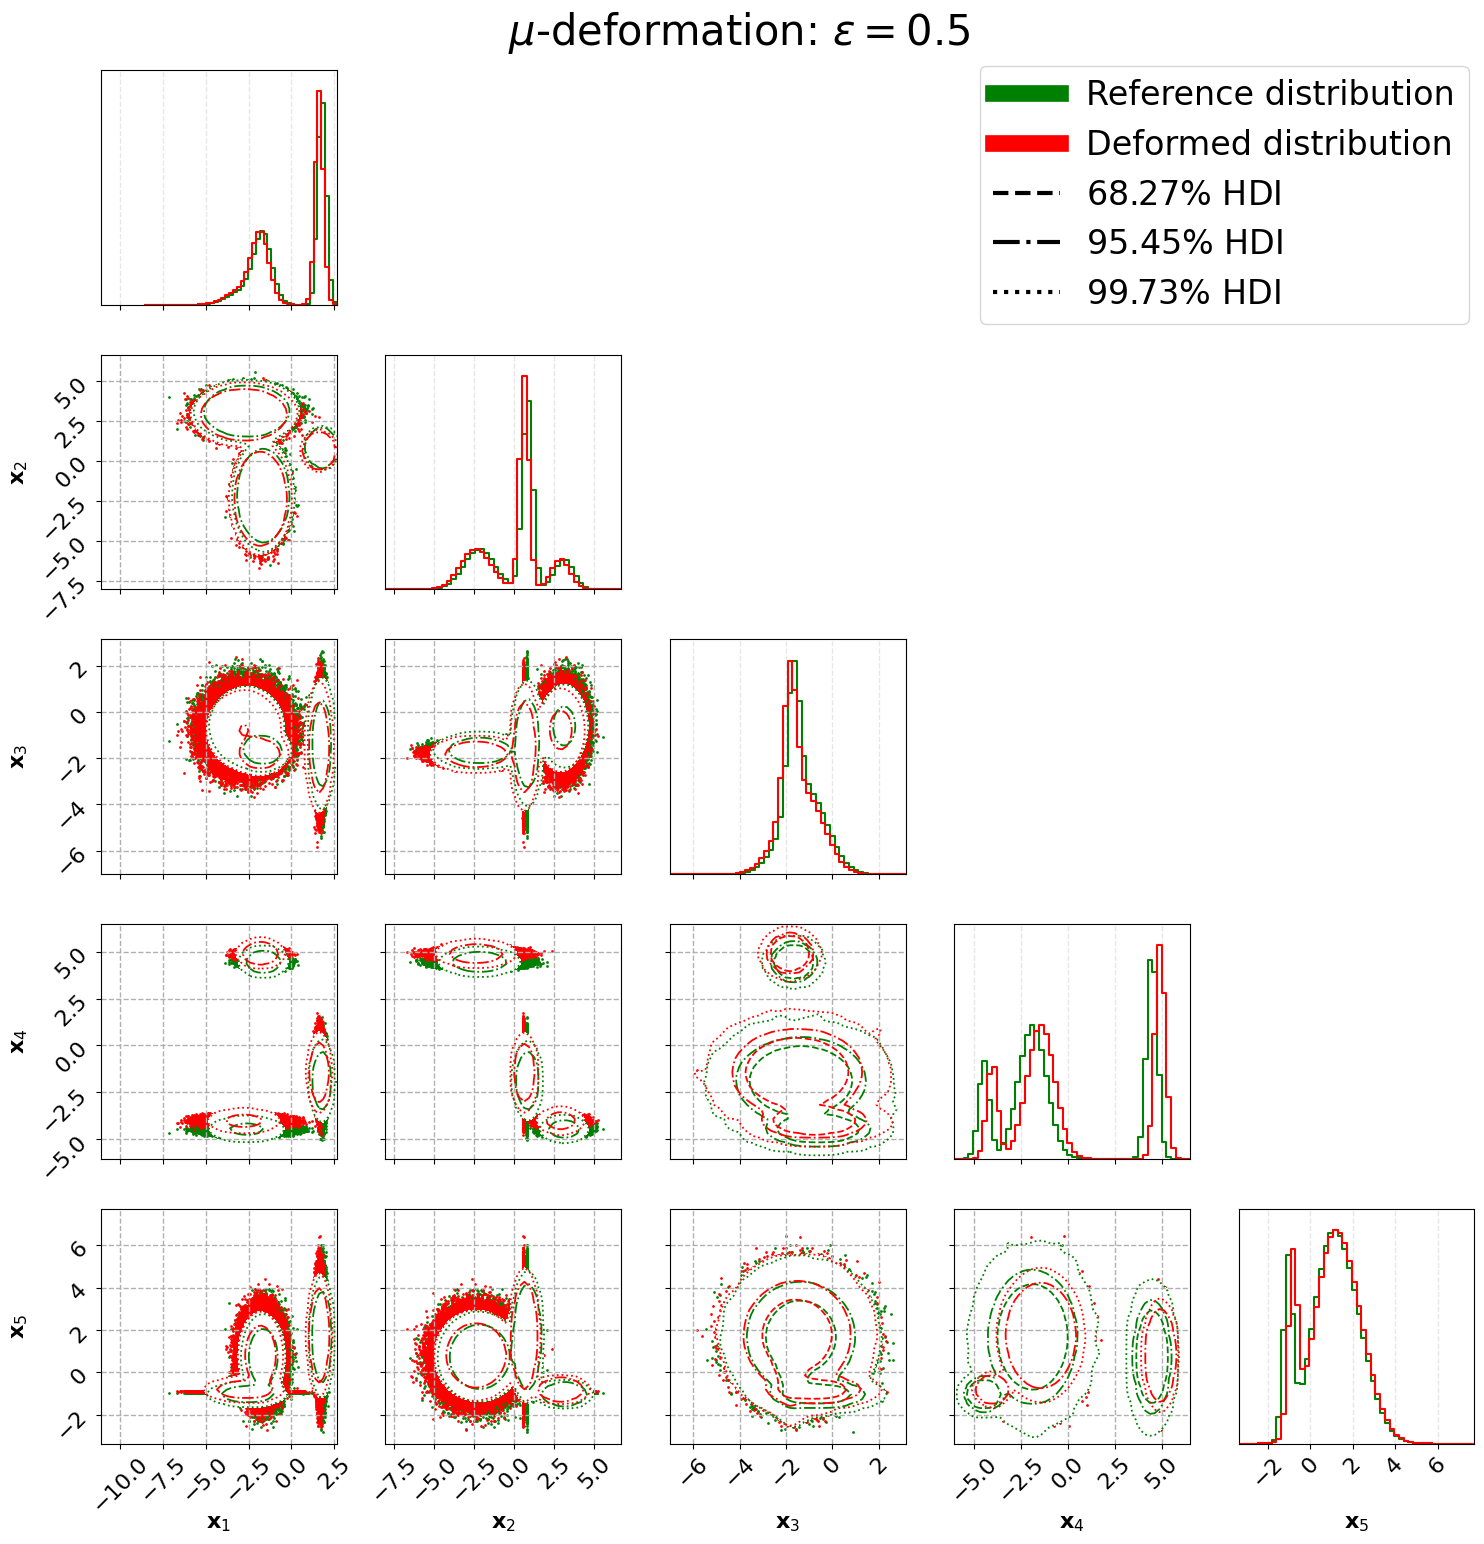

Plot done and saved in 34.01441061962396 s.


In [5]:
plot_corners(dist_1,
             dist_def_1,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mu$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_1.png",
             save = True,
             show = True)

In [6]:
def plot_corr_matrix_side_by_side(dist_1,
                                  dist_2,
                                  path_to_plots,
                                  figure_name = "corre_matrix_plot_side_by_side.pdf",
                                  max_points = 10_000,
                                  title = None,
                                  labels = None,
                                  show_labels = True,
                                  show = False,
                                  save = False) -> None:
    """
    Plots two correlation matrices side by side with a single colorbar in the middle.

    Parameters:
    - dist_1, dist_2: Distributions from which samples are drawn to compute the correlation matrices.
    - path_to_plots: Directory path to save the figure.
    - figure_name: Name of the file to save the figure.
    - max_points: Maximum number of points to sample from each distribution.
    - show_labels: Whether to show labels on the axes.
    - show: Whether to display the plot.
    - save: Whether to save the plot to a file.
    """
    try:
        tf.random.set_seed(0)
        np.random.seed(0)
        samp_1 = dist_1.sample(max_points).numpy()
    except:
        samp_1 = dist_1
    try:
        samp_2 = dist_2.sample(max_points).numpy()
    except:
        samp_2 = dist_2
    if not labels:
        labels = [r"$\mathbf{x}_{%d}$" % i for i in range(1, samp_1.shape[1] + 1)]

    # Create DataFrames
    df1 = pd.DataFrame(samp_1, columns=labels)
    df2 = pd.DataFrame(samp_2, columns=labels)

    # Create figure and axes for subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.2})

    # Plot correlation matrices
    cax1 = ax1.imshow(df1.corr(), interpolation='nearest', vmin=-1, vmax=1)
    cax2 = ax2.imshow(df2.corr(), interpolation='nearest', vmin=-1, vmax=1)

    # Set axis labels
    for ax in (ax1, ax2):
        ax.set_xticks(range(len(labels)))
        ax.set_yticks(range(len(labels)))
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        if show_labels:
            ax.set_xticklabels(labels)
            ax.set_yticklabels(labels, rotation=90)
        else:
            ax.set_xticklabels([])
            ax.set_yticklabels([])

    # Disable grid
    ax1.grid(False)
    ax2.grid(False)

    # Add one colorbar in the middle
    fig.subplots_adjust(right=0.8)
    fig.subplots_adjust(top=1.1)
    cbar_ax = fig.add_axes([0.85, 0.299, 0.05, 0.613])  # Adjust these values to move and resize the colorbar
    fig.colorbar(cax1, cax=cbar_ax)
    
    if title:
        fig.suptitle(title, fontsize=20)

    # Saving the figure
    if save:
        figure_path = os.path.join(path_to_plots, figure_name)
        _, file_extension = os.path.splitext(figure_name)
        save_kwargs = {}
        if file_extension.lower() in ['.jpg', '.jpeg', '.png']:
            save_kwargs['pil_kwargs'] = {'quality': 50}
        plt.savefig(figure_path, **save_kwargs)

    # Show plot if requested
    if show:
        plt.show()

    plt.close()
    return

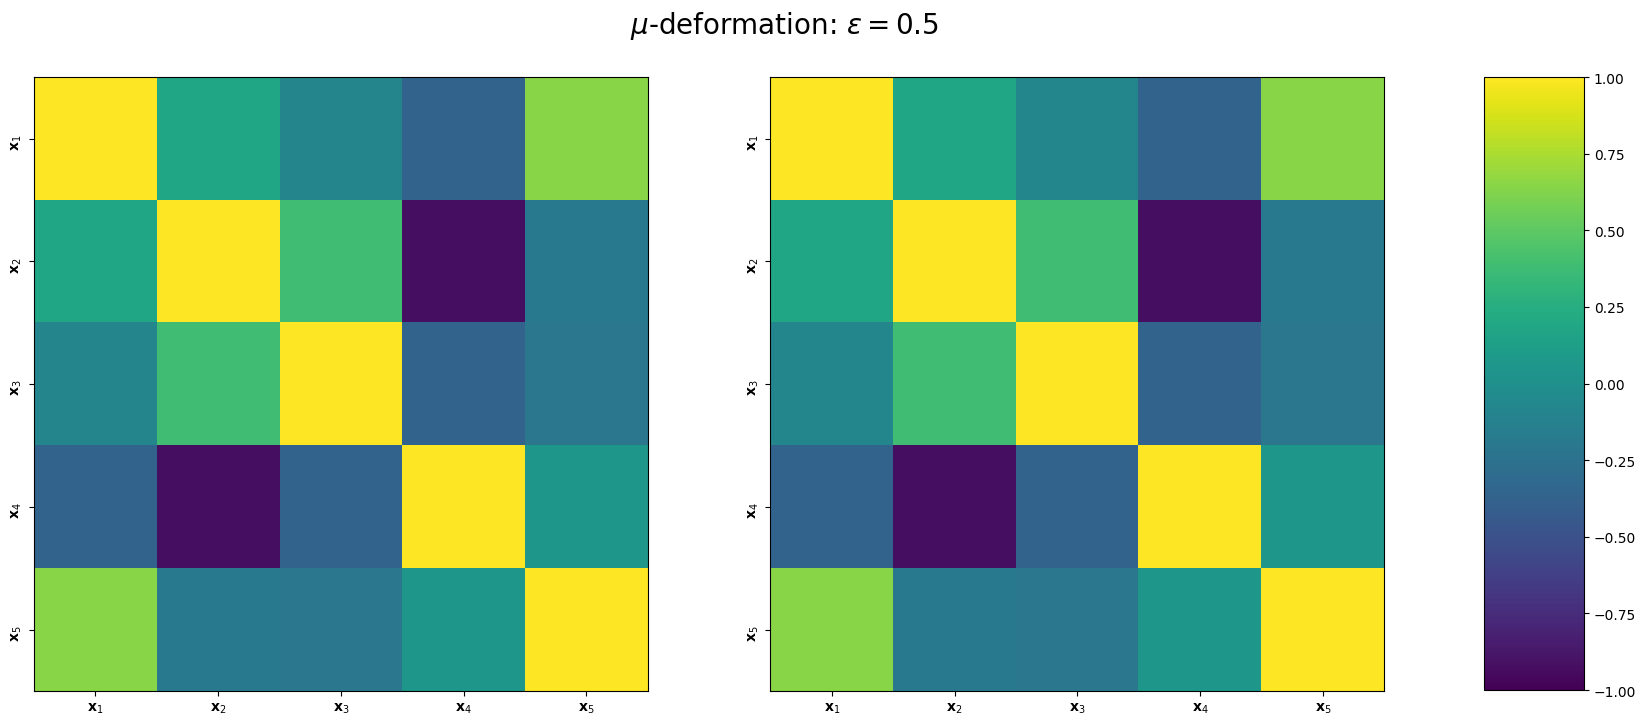

In [7]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_1, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_1.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\mu$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 2 - $\Sigma_{ij}$-deformation

In [8]:
eps = 0.5
dist_def_2 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "cov_diag",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.061834360007196665 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.058547914028167725 s.
Computing HPD intervals...


HPD intervals computed in 3.6436211029067636 s.
Computing HPD quotas...
HPD quotas computed in 4.828305064700544 s.
Plotting corner plot...


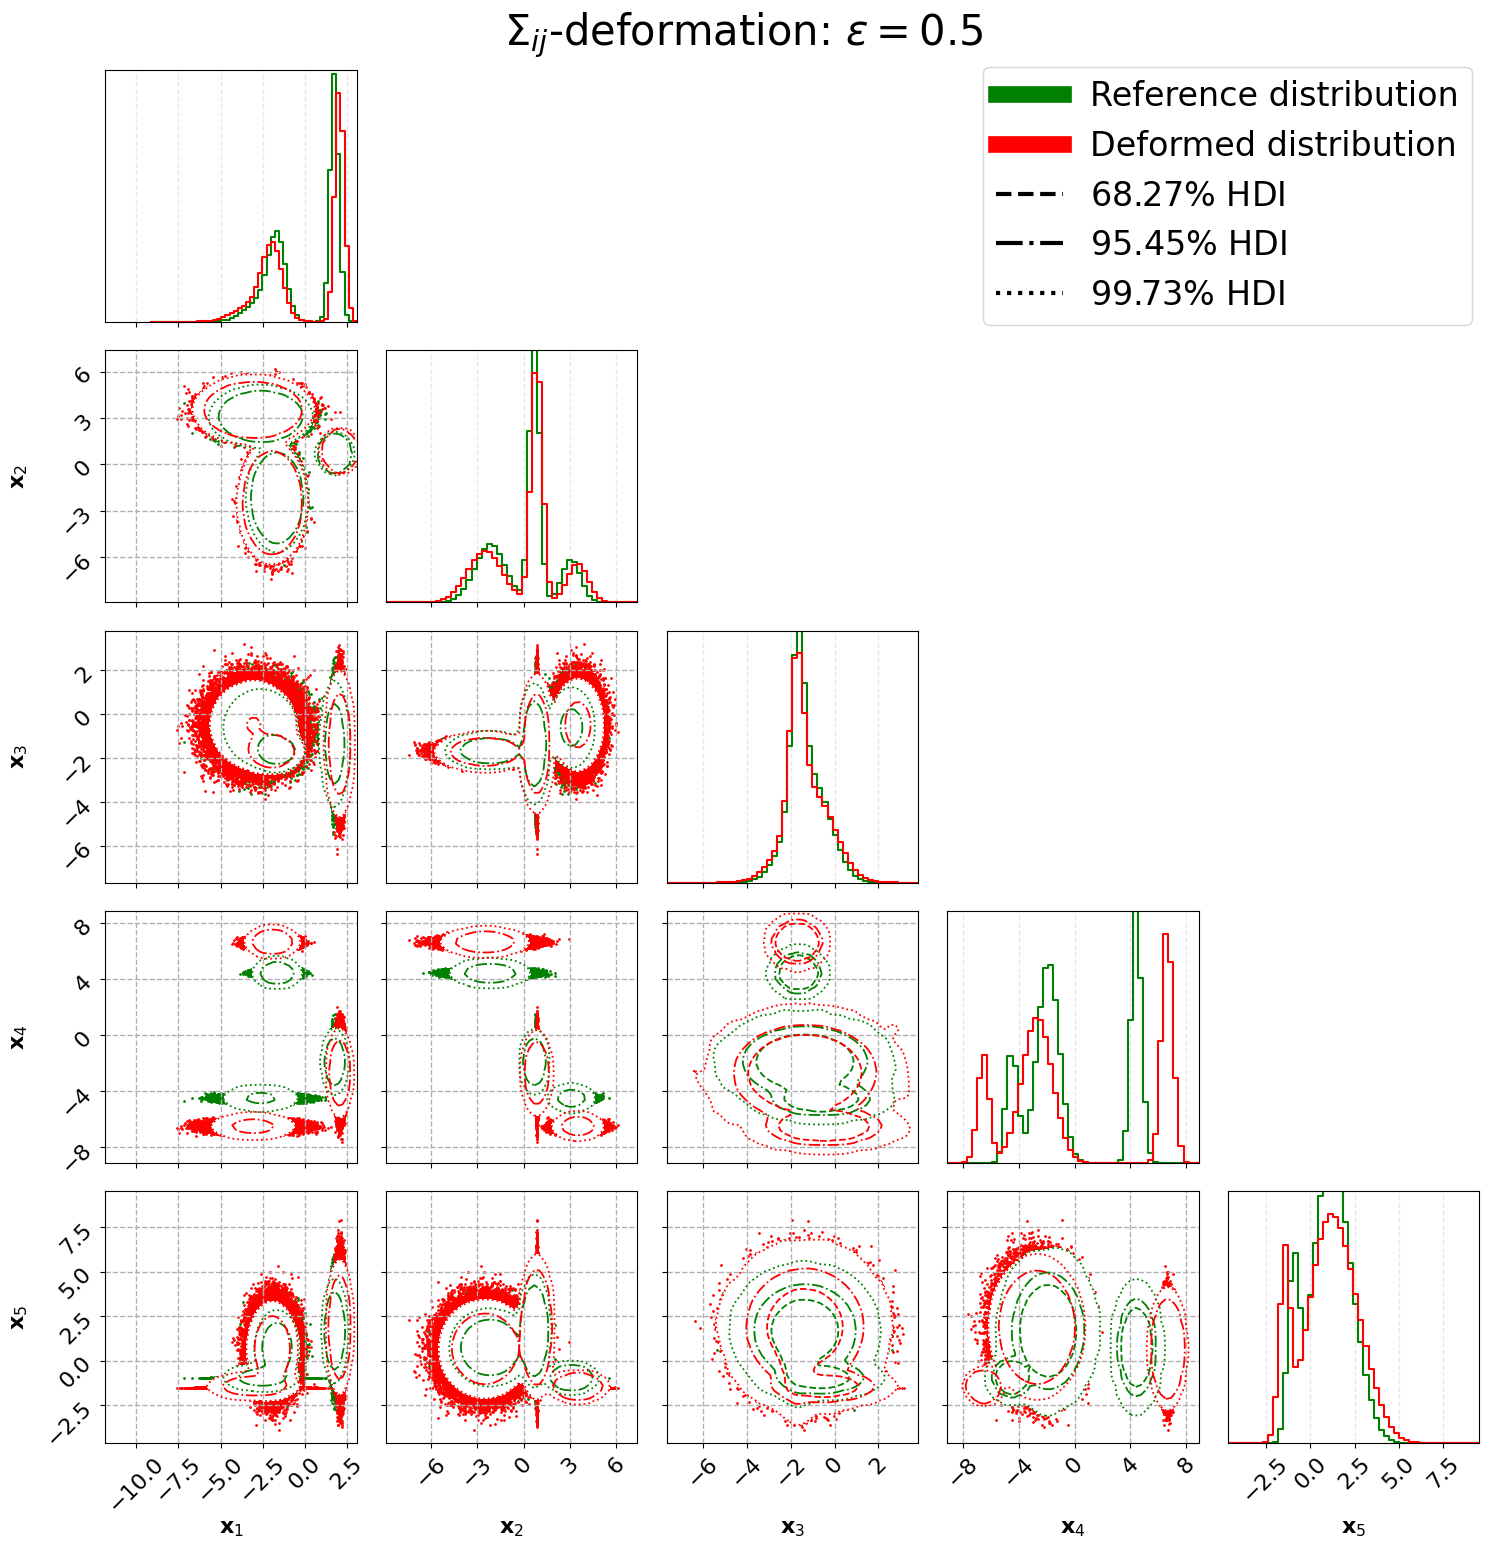

Plot done and saved in 34.04803791223094 s.


In [9]:
plot_corners(dist_1,
             dist_def_2,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\Sigma_{ij}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_2.png",
             save = True,
             show = True)

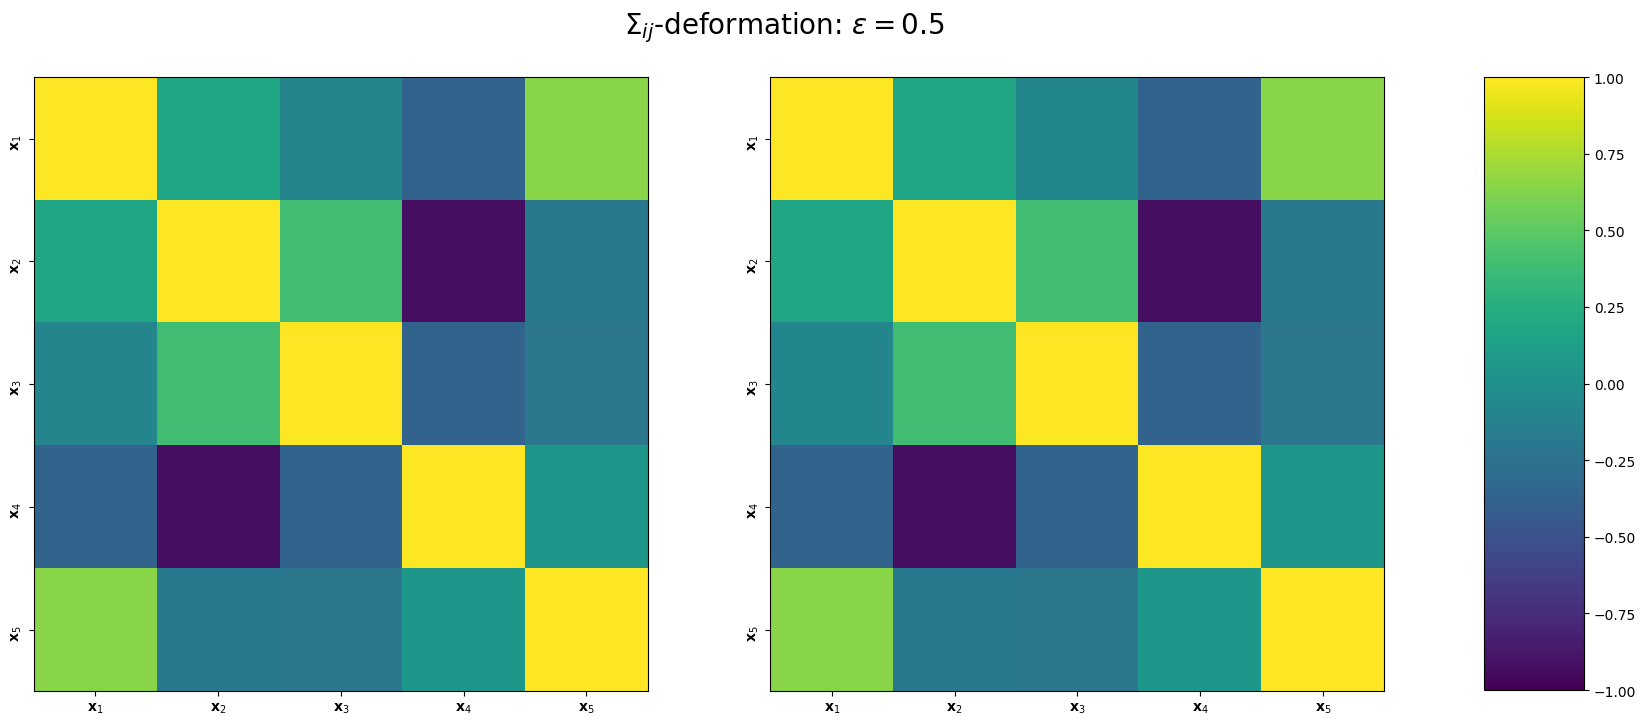

In [10]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_2, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_2.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\Sigma_{ij}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 3 - $\Sigma_{i\neq j}$-deformation

In [11]:
eps = 0.5
dist_def_3 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "cov_off_diag",
                                                shuffle_type = "random",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.05930540710687637 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.16801711497828364 s.
Computing HPD intervals...
HPD intervals computed in 3.388877931982279 s.
Computing HPD quotas...
HPD quotas computed in 4.191289508249611 s.
Plotting corner plot...


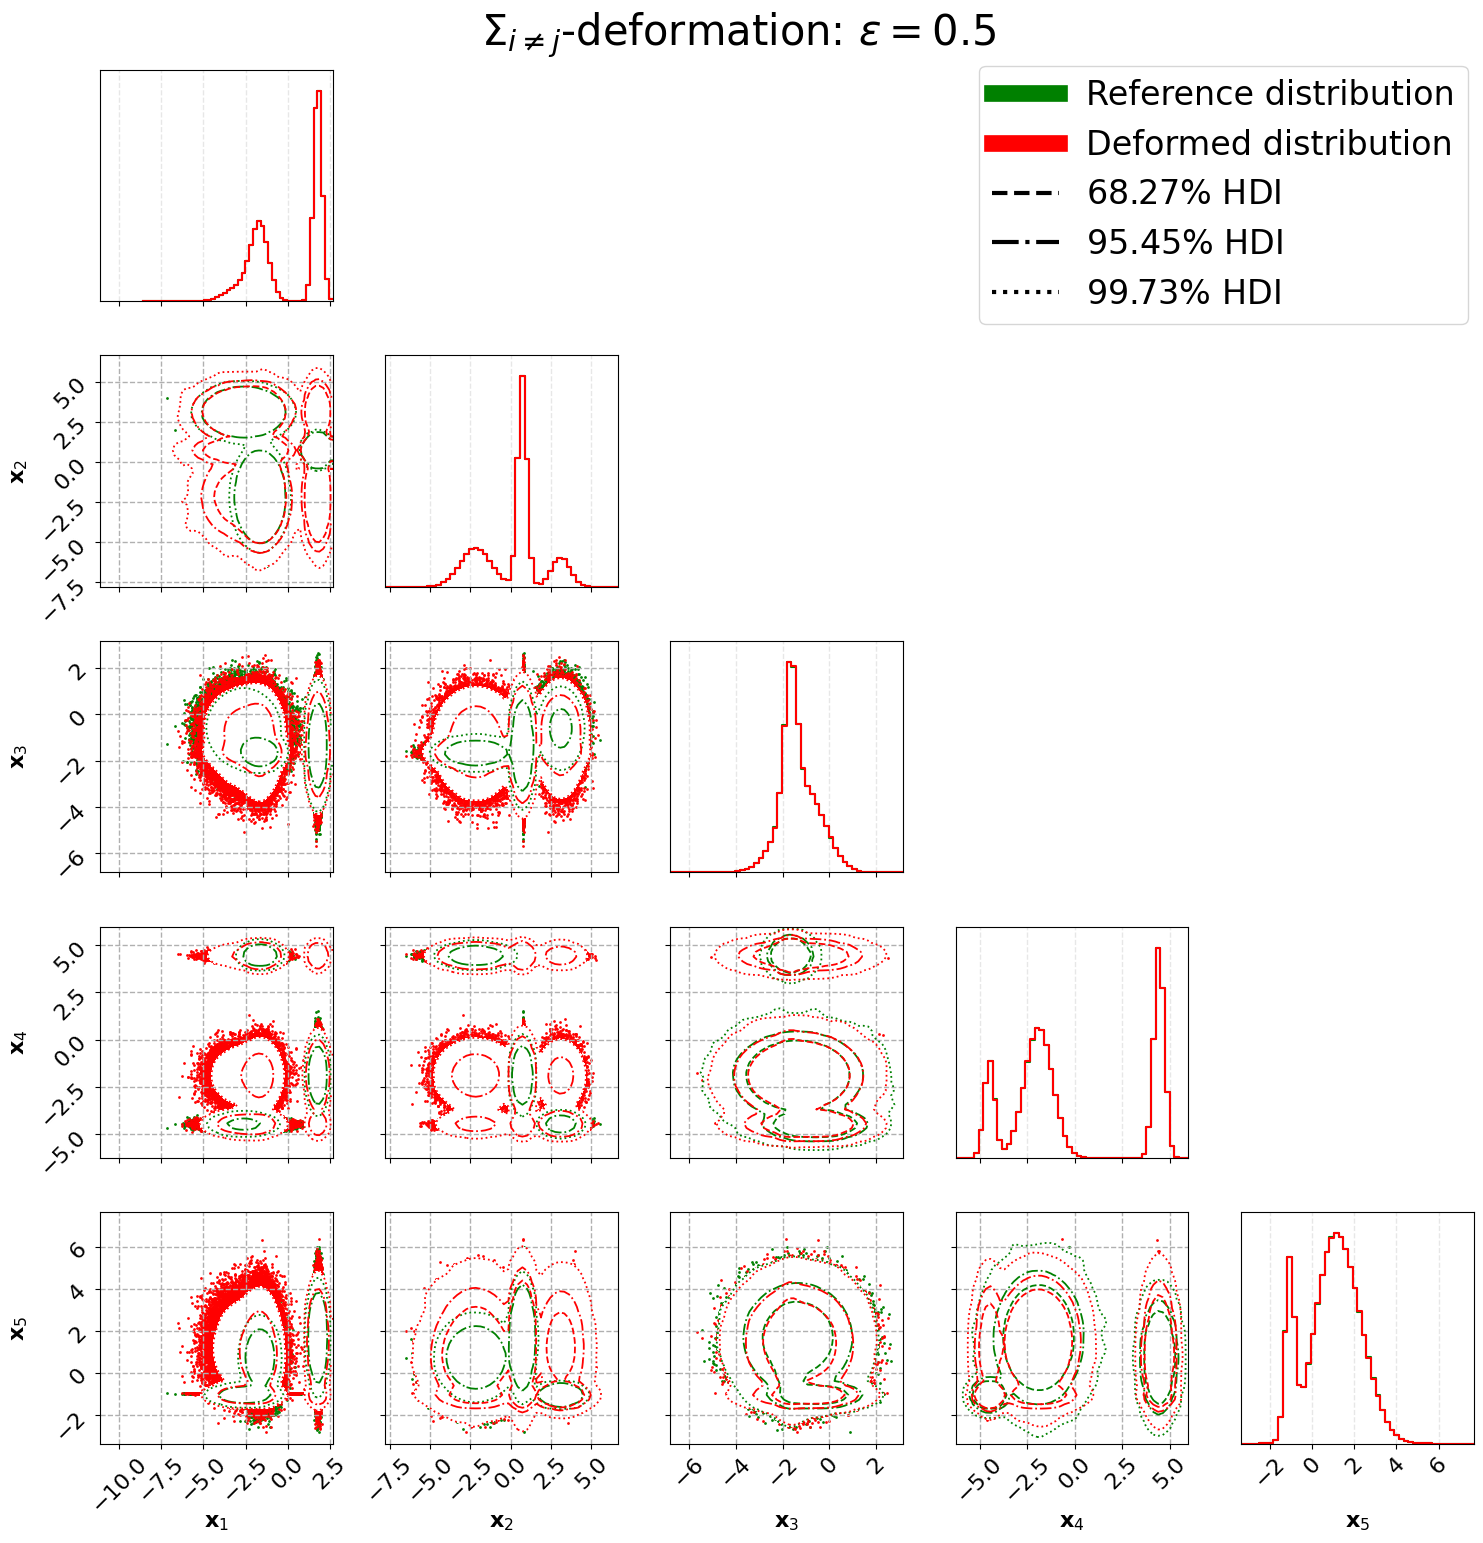

Plot done and saved in 33.09545785933733 s.


In [12]:
plot_corners(dist_1,
             dist_def_3,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\Sigma_{i\\neq j}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_3.png",
             save = True,
             show = True)

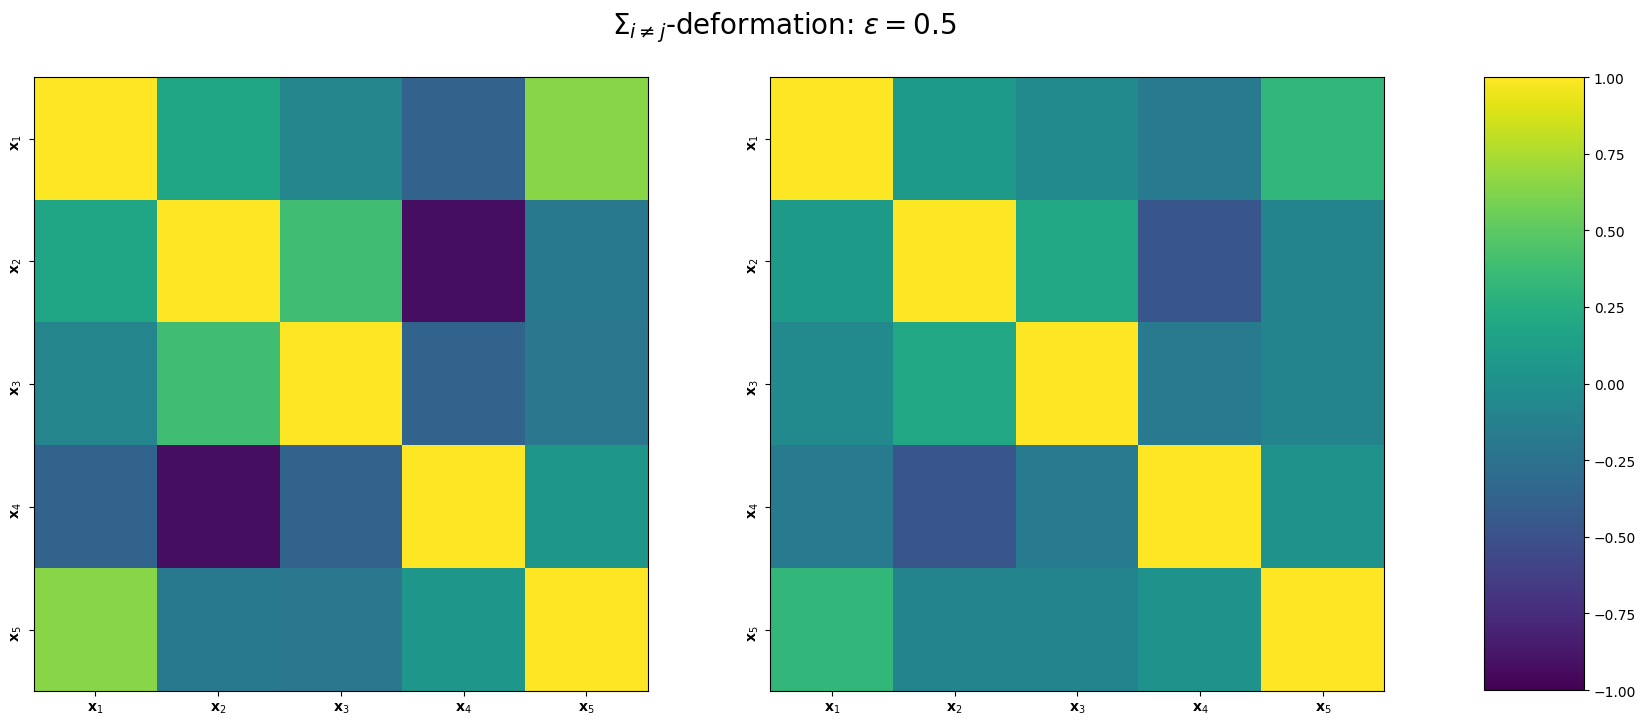

In [13]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_3, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_3.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\Sigma_{i\\neq j}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 4 - pow$^{+}$-deformation

In [14]:
eps = 0.5
dist_def_4 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "power_abs",
                                                direction = "up")

Sampling from dist_1...
Sampling from dist_1 done in 0.07222190964967012 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.39861337607726455 s.
Computing HPD intervals...
HPD intervals computed in 3.467803993728012 s.
Computing HPD quotas...
HPD quotas computed in 3.440893125720322 s.
Plotting corner plot...


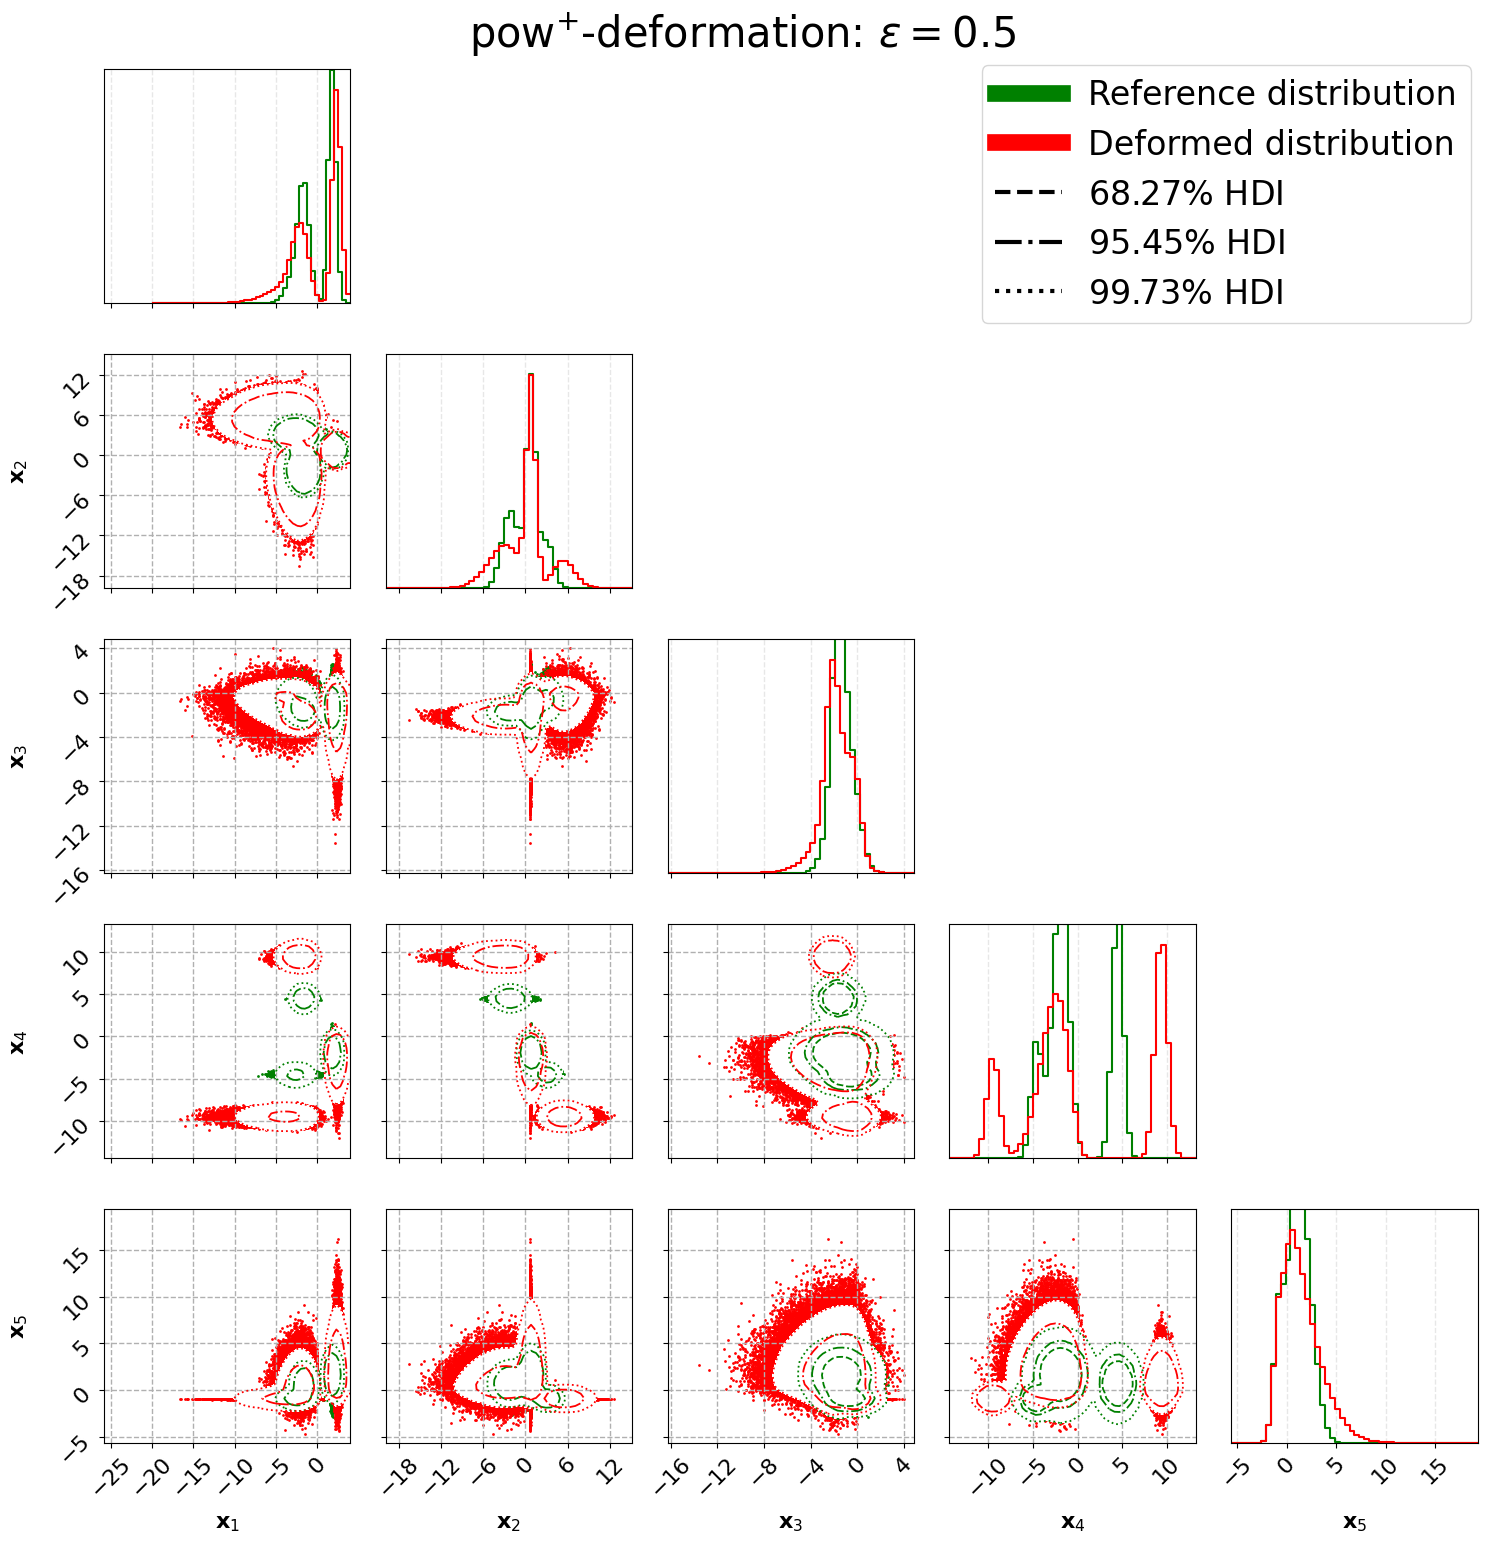

Plot done and saved in 31.897234946954995 s.


In [15]:
plot_corners(dist_1,
             dist_def_4,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "pow$^{+}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_4.png",
             save = True,
             show = True)

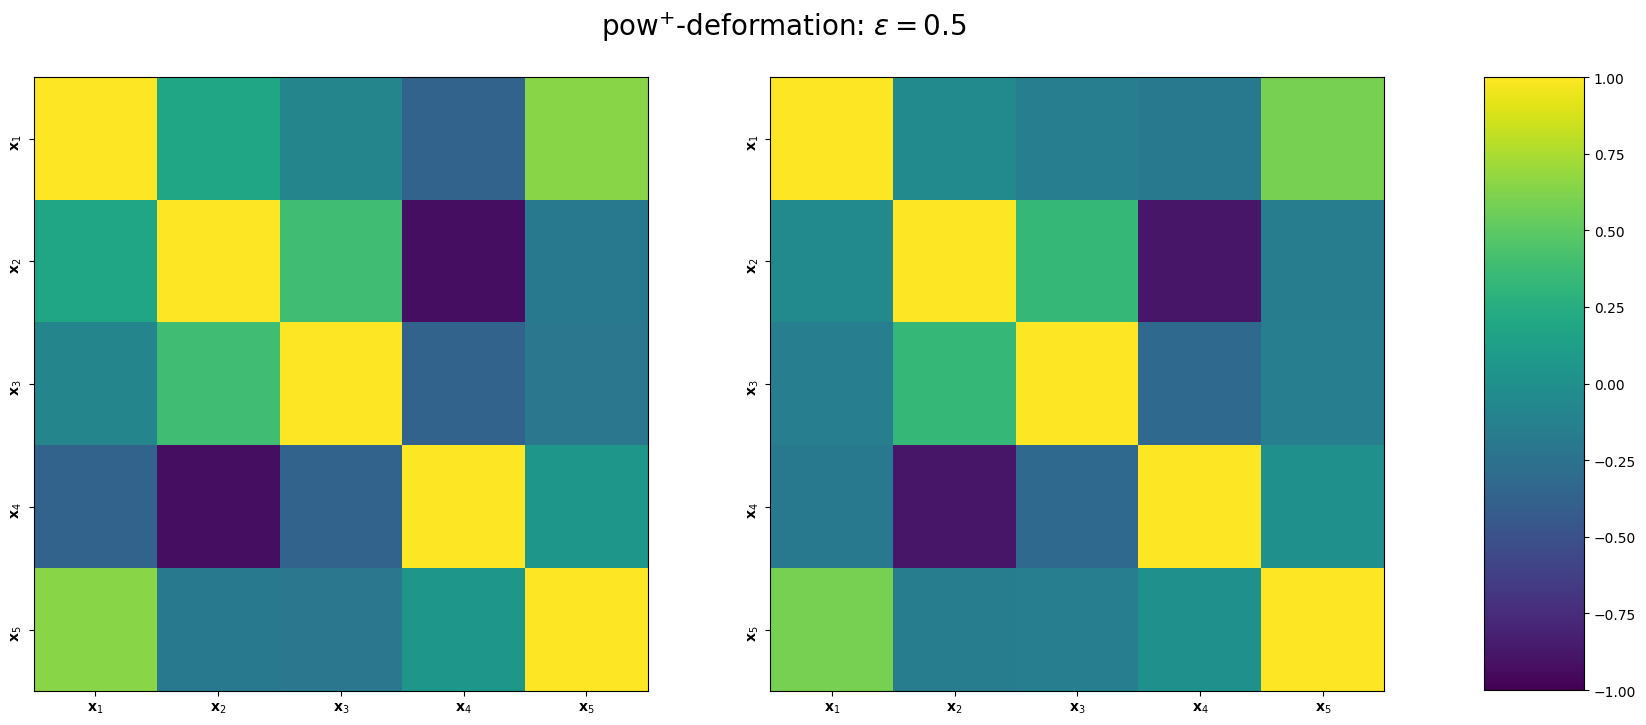

In [16]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_4, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_4.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("pow$^{+}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 5 - pow$^{-}$-deformation

In [17]:
eps = 0.5
dist_def_5 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "power_abs",
                                                direction = "down")

Sampling from dist_1...
Sampling from dist_1 done in 0.0715257111005485 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.057557857129722834 s.
Computing HPD intervals...
HPD intervals computed in 2.8715558811090887 s.
Computing HPD quotas...
HPD quotas computed in 4.04945203429088 s.
Plotting corner plot...


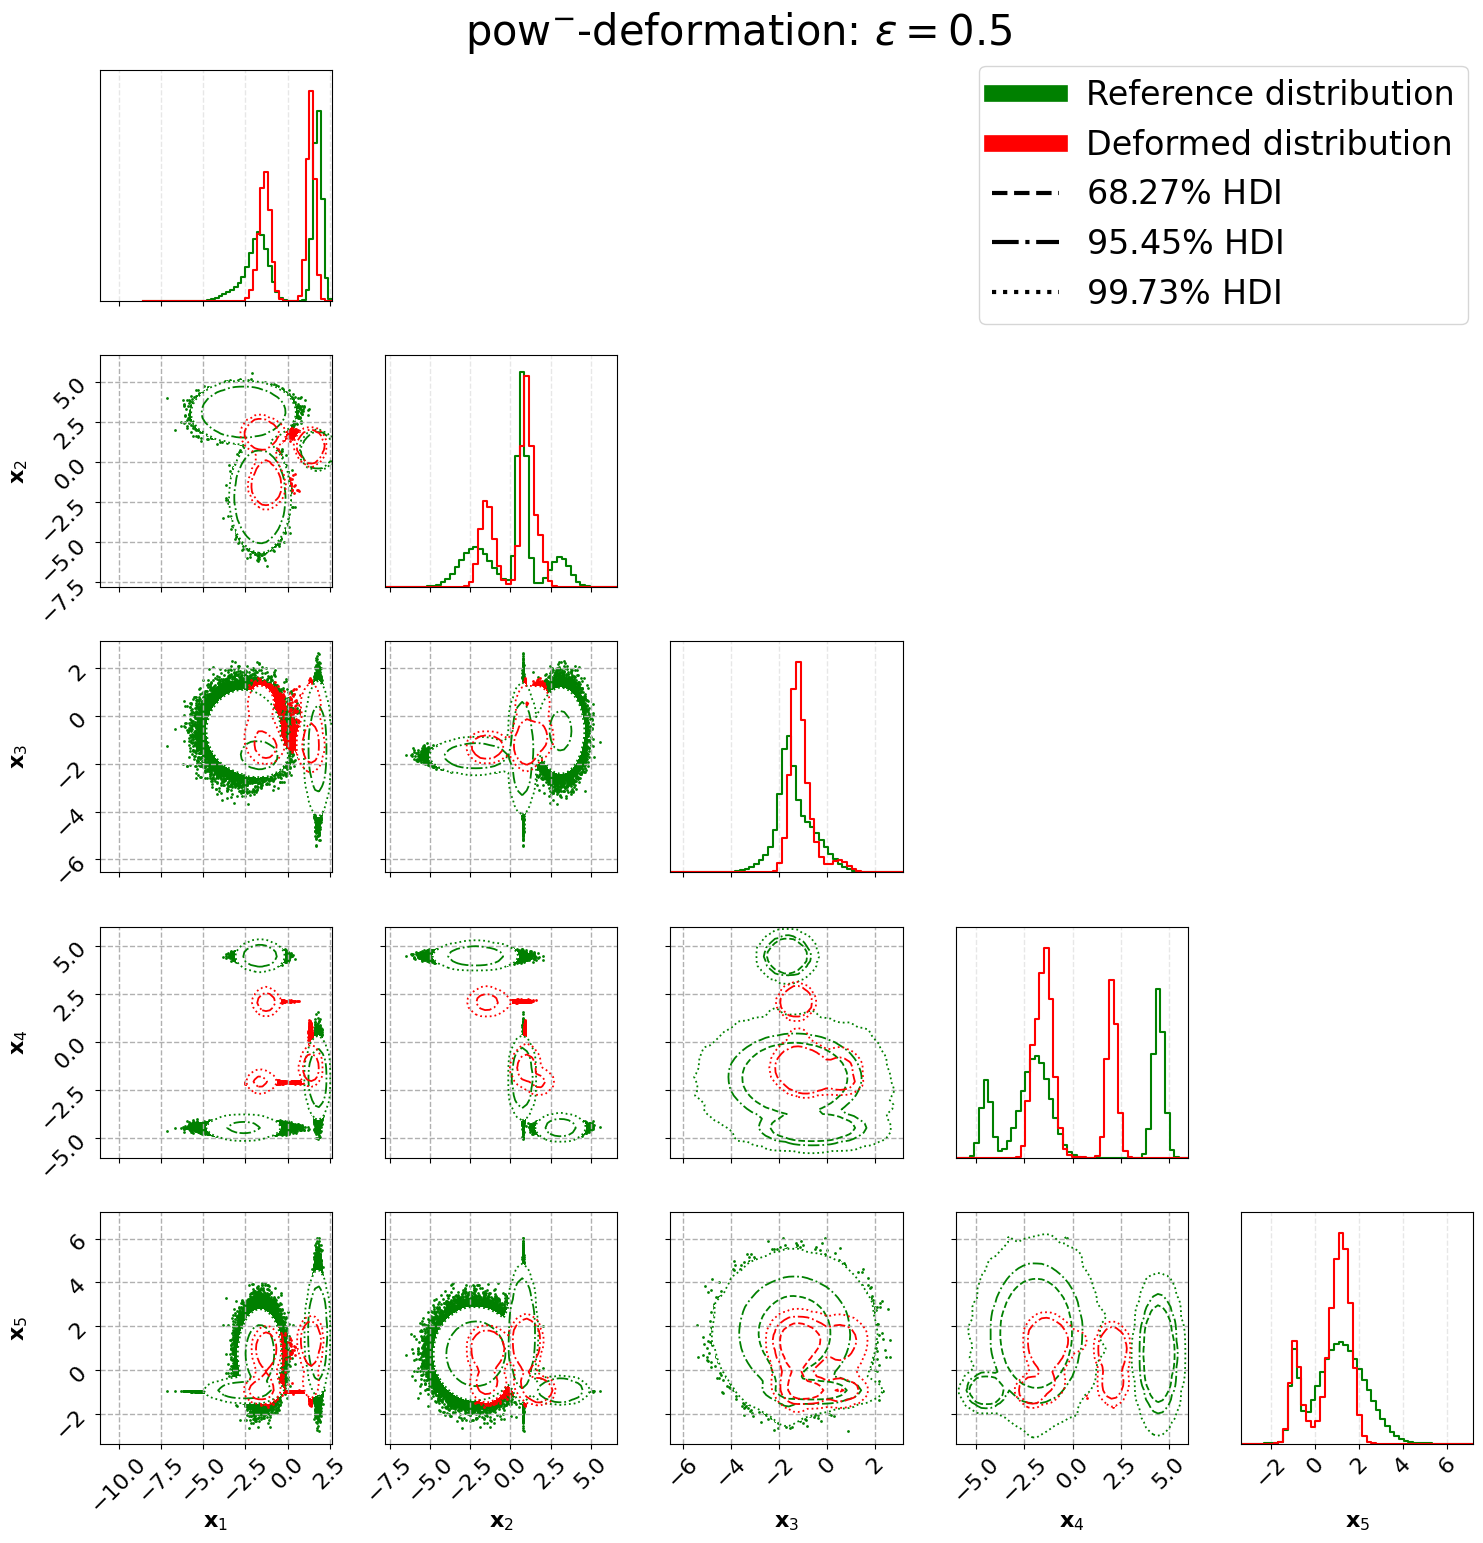

Plot done and saved in 31.747338494751602 s.


In [18]:
plot_corners(dist_1,
             dist_def_5,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "pow$^{-}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_5.png",
             save = True,
             show = True)

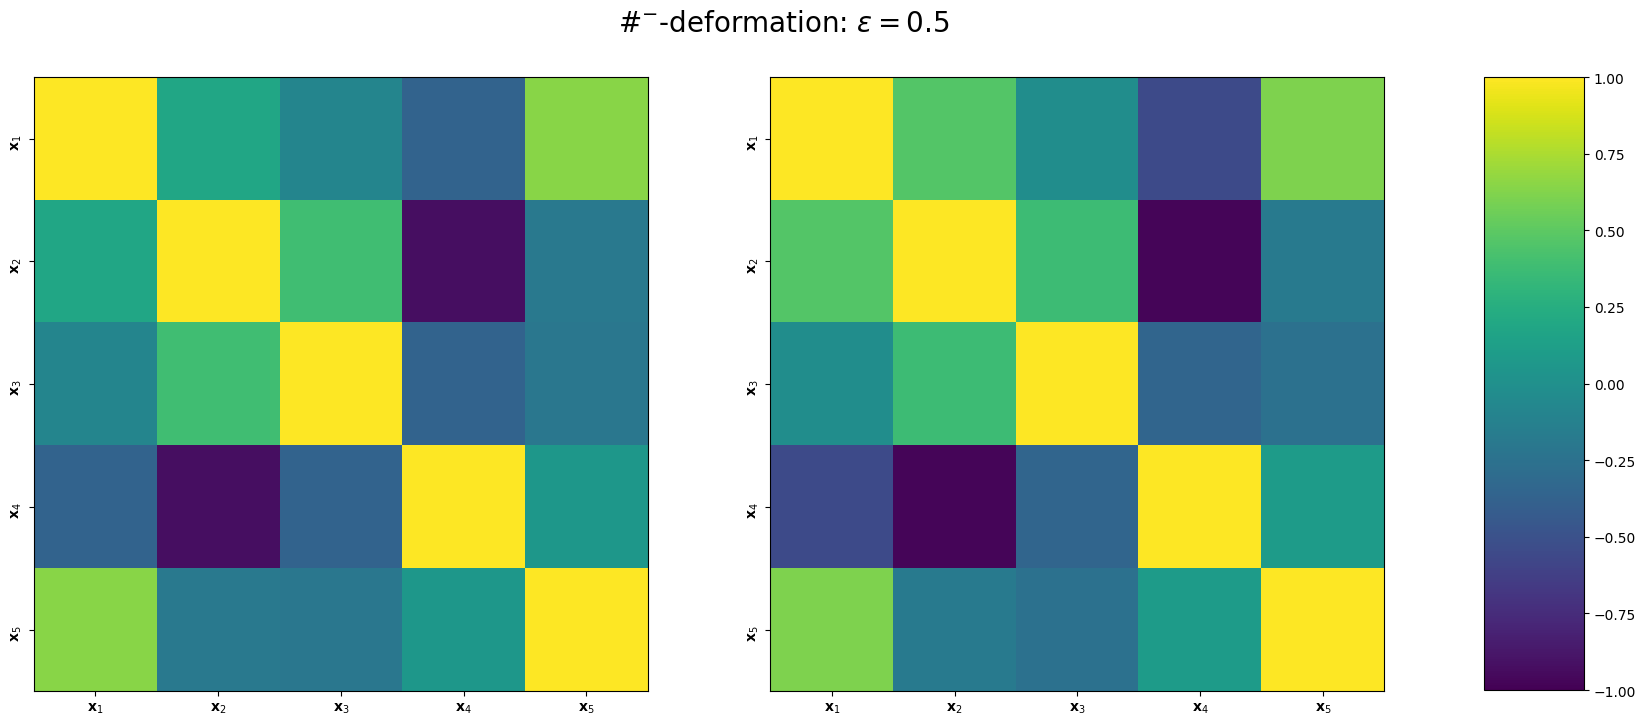

In [19]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_5, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_5.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\#^{-}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 6 - $\mathcal{N}$-deformation

In [20]:
eps = 0.5
dist_def_6 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "random",
                                                shift_dist = "normal",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.06102135498076677 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.05272185988724232 s.
Computing HPD intervals...


HPD intervals computed in 4.860812519676983 s.
Computing HPD quotas...
HPD quotas computed in 4.334189447108656 s.
Plotting corner plot...


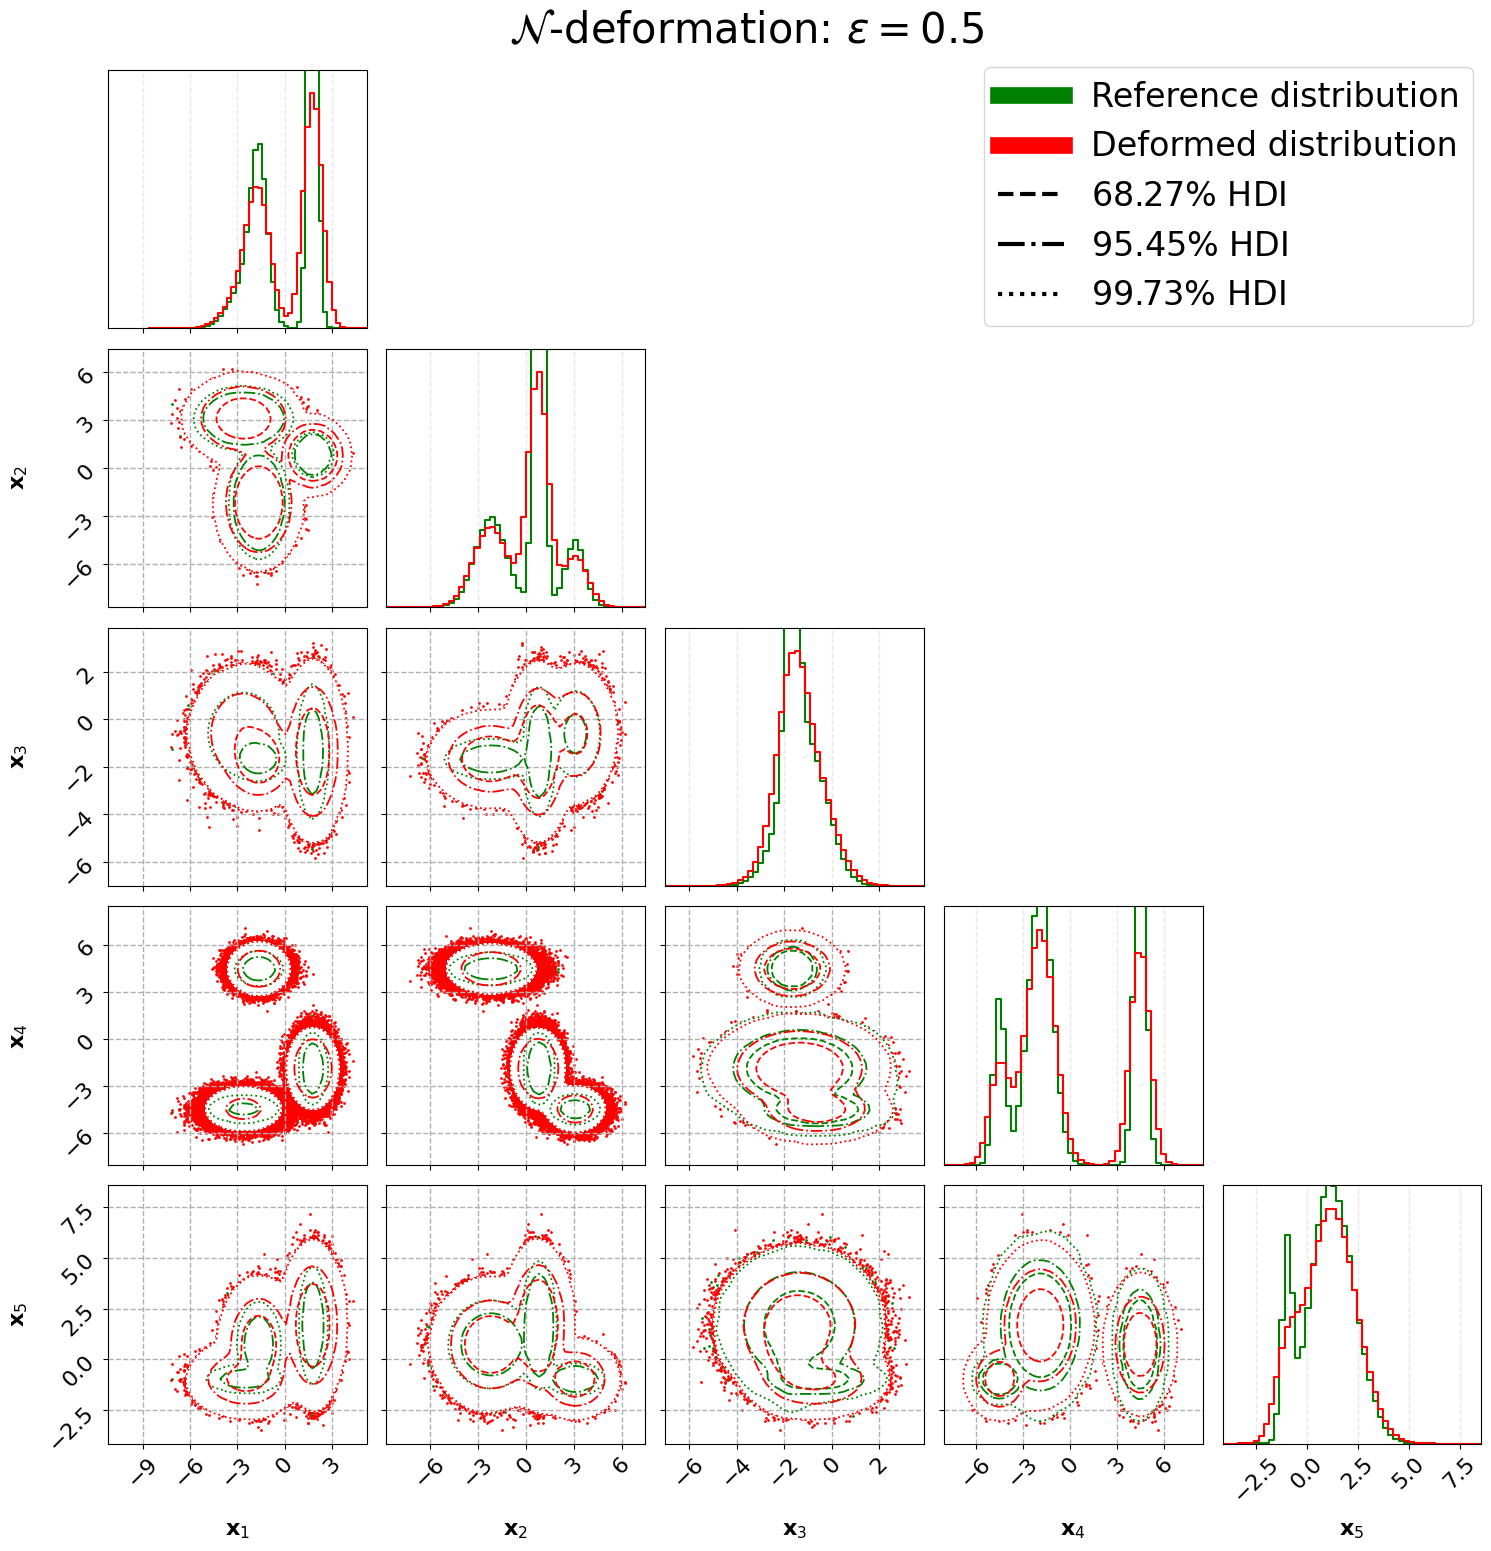

Plot done and saved in 34.8260672991164 s.


In [21]:
plot_corners(dist_1,
             dist_def_6,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mathcal{N}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_6.png",
             save = True,
             show = True)

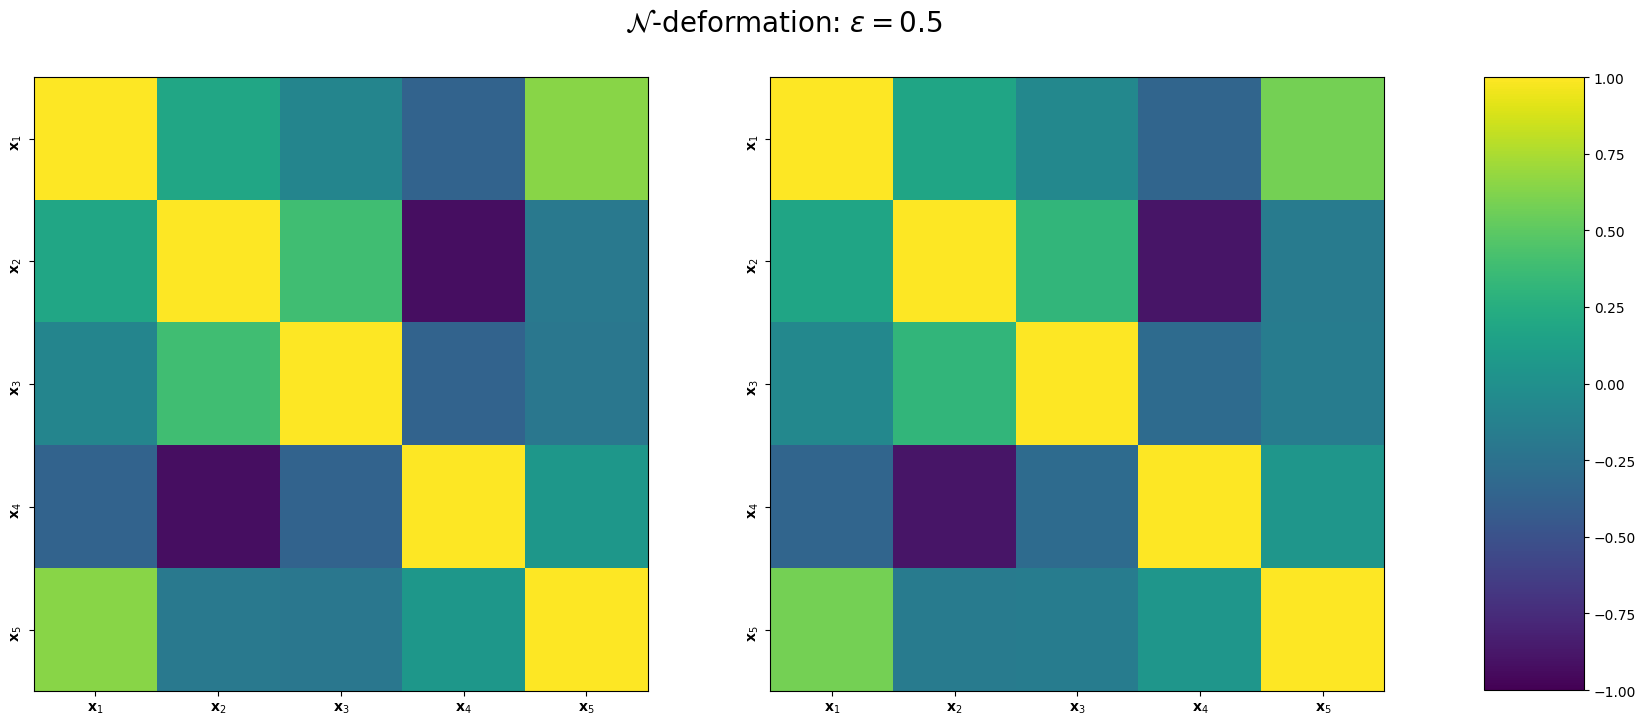

In [22]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_6, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_6.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\mathcal{N}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 7 - $\mathcal{U}$-deformation

In [23]:
eps = 0.5
dist_def_7 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "random",
                                                shift_dist = "uniform",
                                                seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.046109308023005724 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.0389392483048141 s.
Computing HPD intervals...
HPD intervals computed in 3.4435887332074344 s.
Computing HPD quotas...
HPD quotas computed in 3.5759802791289985 s.
Plotting corner plot...


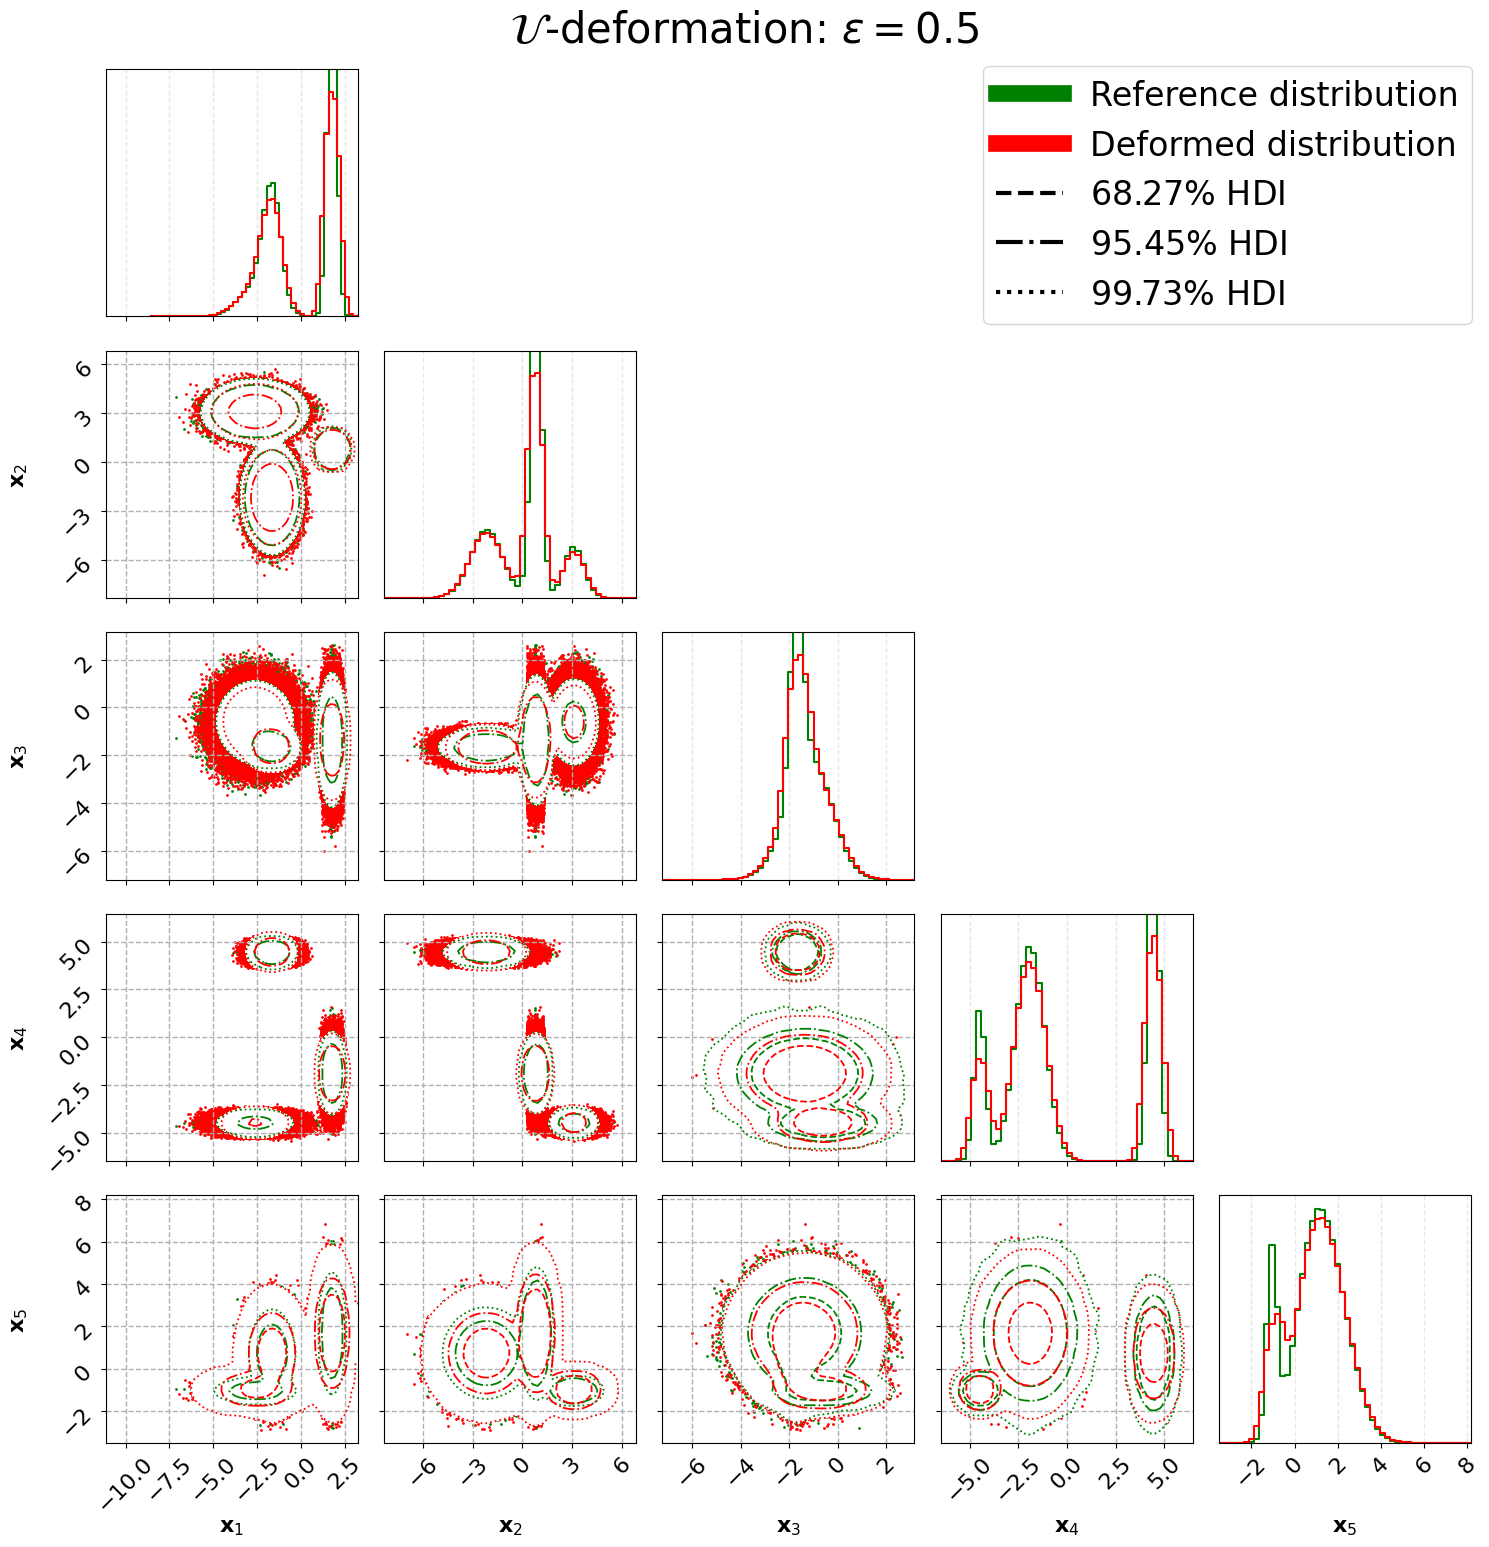

Plot done and saved in 31.509743527974933 s.


In [24]:
plot_corners(dist_1,
             dist_def_7,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mathcal{U}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_7.png",
             save = True,
             show = True)

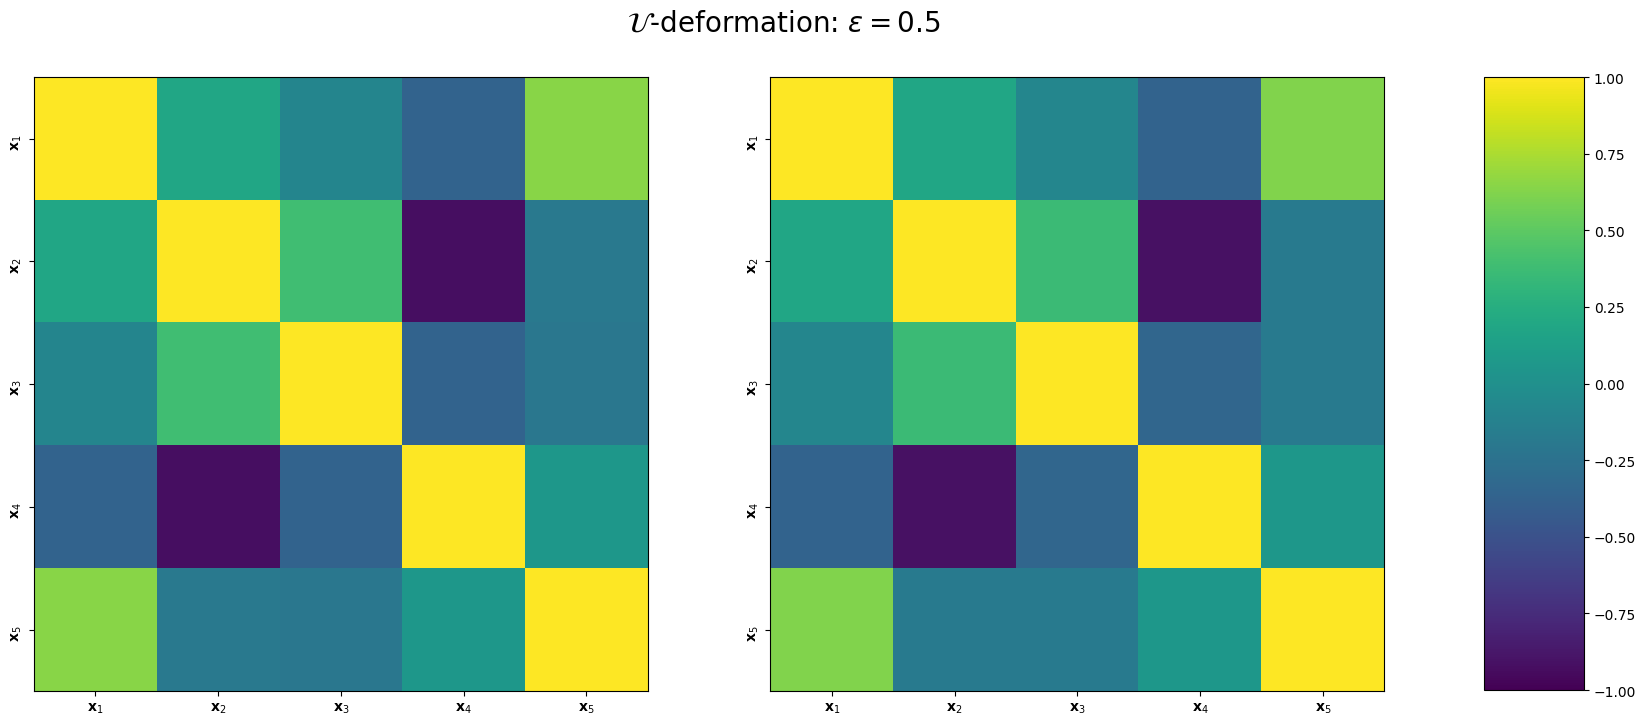

In [25]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_7, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_7.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\mathcal{U}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)